In [ ]:
! pip install pulp
!pip install ortools
!pip install pandas
!pip install plotly==5.11.0
import pulp
import pandas as pd
import numpy as np
from pulp import *
import scipy.linalg as la
import matplotlib.pyplot as plt
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached plotly-5.11.0-py2.py3-none-any.whl (15.3 MB)
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [ ]:
# importing module
from pandas import *
 
# reading CSV file
data = read_csv("pulp world tour.csv")
 
# converting column data to list
re = data['Revenue'].tolist()
sc = data['staging cost'].tolist()
 
# printing list data
print('Revenue:', re)
print('staging cost:', sc)

Revenue: [3053757, 6068587, 5542416, 3084751, 9595926, 6047287, 6157016, 2497179, 3585950, 5919784, 2864412, 2937858, 3019237, 2706061, 2937858, 2937858, 3158198, 2564603, 2921847, 3653814, 3129113, 4414719, 2717519, 4110771, 5693182, 2351000, 2460745, 4232458, 7545958, 4728519, 3400769, 1999478, 2728477, 2872546, 2490273, 3503930, 1655010, 1410600, 5067514, 3520275, 4942830, 4007700, 1505114, 1335900, 3117100, 5967020, 3562400, 1091910, 1605750, 1059795, 2664132, 1150295, 2581532, 3315103, 1424172, 5138400, 1156140, 3319663, 1091910, 6201407, 3240596, 1059795, 5614409, 588989, 1988047, 1253040, 2190960, 2401240, 1374680, 5751917, 1050542, 1396290, 3630354, 1263310, 1130330, 5408164, 930860, 1928210, 3324500, 1130330, 2260660, 797880, 1063840, 997350, 1728740, 644953, 731390, 3723440, 1262246, 1329800, 1329800]
staging cost: [150000, 250000, 250000, 250000, 400000, 250000, 250000, 80000, 150000, 250000, 150000, 80000, 150000, 80000, 80000, 80000, 150000, 150000, 80000, 150000, 150000, 

In [ ]:
profit=np.array(re)- np.array(sc)
n=len(profit) # number of items 
profit1=profit.tolist()

In [ ]:
problem = pulp.LpProblem("World Tour",LpMaximize) # it's a maximum linear programming problem

/usr/local/lib/python3.8/dist-packages/pulp/pulp.py:1352: UserWarning:

Spaces are not permitted in the name. Converted to '_'



In [ ]:
X = pulp.LpVariable.dicts("X",range(n), cat='Binary') #only choose item 0 or 1 time for Binary
X

{0: X_0,
 1: X_1,
 2: X_2,
 3: X_3,
 4: X_4,
 5: X_5,
 6: X_6,
 7: X_7,
 8: X_8,
 9: X_9,
 10: X_10,
 11: X_11,
 12: X_12,
 13: X_13,
 14: X_14,
 15: X_15,
 16: X_16,
 17: X_17,
 18: X_18,
 19: X_19,
 20: X_20,
 21: X_21,
 22: X_22,
 23: X_23,
 24: X_24,
 25: X_25,
 26: X_26,
 27: X_27,
 28: X_28,
 29: X_29,
 30: X_30,
 31: X_31,
 32: X_32,
 33: X_33,
 34: X_34,
 35: X_35,
 36: X_36,
 37: X_37,
 38: X_38,
 39: X_39,
 40: X_40,
 41: X_41,
 42: X_42,
 43: X_43,
 44: X_44,
 45: X_45,
 46: X_46,
 47: X_47,
 48: X_48,
 49: X_49,
 50: X_50,
 51: X_51,
 52: X_52,
 53: X_53,
 54: X_54,
 55: X_55,
 56: X_56,
 57: X_57,
 58: X_58,
 59: X_59,
 60: X_60,
 61: X_61,
 62: X_62,
 63: X_63,
 64: X_64,
 65: X_65,
 66: X_66,
 67: X_67,
 68: X_68,
 69: X_69,
 70: X_70,
 71: X_71,
 72: X_72,
 73: X_73,
 74: X_74,
 75: X_75,
 76: X_76,
 77: X_77,
 78: X_78,
 79: X_79,
 80: X_80,
 81: X_81,
 82: X_82,
 83: X_83,
 84: X_84,
 85: X_85,
 86: X_86,
 87: X_87,
 88: X_88,
 89: X_89,
 90: X_90}

In [ ]:
objective = sum([X[i]* profit1[i] for i in range(n)])
problem.setObjective(objective)

In [ ]:
for i in profit1:
    problem += sum([X[i] for i in range(0,n)]) == 70

In [ ]:
problem.solve(pulp.PULP_CBC_CMD(msg=0));

In [ ]:
x = np.zeros(n)
for i in range(n):
    x[i] = X[i].value()
x

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 1.])

In [ ]:
def WorldTour(re,sc):
    profit=np.array(re)- np.array(sc) # profit = revenue - staging cost
    profit1=profit.tolist()
    n=len(profit1) # number of cities 
    problem = pulp.LpProblem("World Tour",LpMaximize)
    X = pulp.LpVariable.dicts("X",range(n), cat='Binary') #only choose item 0 or 1 time for Binary
    objective = sum([X[i]* profit1[i] for i in range(n)]) #objective function
    problem.setObjective(objective) # set objective function
    for i in profit1:
        problem += sum([X[i] for i in range(0,n)]) == 70 #set the constraints of 70 cities
    problem.solve(pulp.PULP_CBC_CMD(msg=0));  #problem solve
    x = np.zeros(n)
    for i in range(n):
        x[i] = X[i].value()
    return x

print(WorldTour(re,sc)) #The result: 0 for not choose, 1 for choose

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1.]


In [ ]:
final = WorldTour(re,sc) #generate the City-selection function

In [ ]:
Tota_raw_profit = np.dot(final,profit) #calculate the sum of profit among selected 70 cities
Tota_raw_profit

232586315.0

In [ ]:
df = pd.read_csv('Big Data TSP.csv')

In [ ]:
df.head()

,0,367,300,1223,1754,2298,4162,3618,3983,2239,...,30000.37,30000.38,30000.39,30000.40,30000.41,30000.42,30000.43,30000.44,30000.45,30000.46
0,367,0,664,859,1482,1933,3893,3324,3682,1886,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
1,300,664,0,1523,2025,2589,4352,3832,4202,2513,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
2,1223,859,1523,0,957,1120,3442,2811,3133,1177,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
3,1754,1482,2025,957,0,1537,4160,3499,3769,1804,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
4,2298,1933,2589,1120,1537,0,2654,1988,2236,397,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000


In [ ]:
matrix = np.loadtxt('Big Data TSP.csv', delimiter=',')
print(matrix)

[[    0.   367.   300. ... 30000. 30000. 30000.]
 [  367.     0.   664. ... 30000. 30000. 30000.]
 [  300.   664.     0. ... 30000. 30000. 30000.]
 ...
 [30000. 30000. 30000. ...     0.  2530.  1477.]
 [30000. 30000. 30000. ...  2530.     0.  3907.]
 [30000. 30000. 30000. ...  1477.  3907.     0.]]


In [ ]:
"""Simple Travelling Salesperson Problem (TSP) between cities."""

from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp


def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = matrix
    data['num_vehicles'] = 1
    data['depot'] = 0

    return data


def print_solution(manager, routing, solution):
    """Prints solution on console."""
    print('Objective: {} miles'.format(solution.ObjectiveValue()))
    index = routing.Start(0)
    plan_output = 'Route for vehicle 0:\n'
    route_distance = 0
    while not routing.IsEnd(index):
        plan_output += ' {} ->'.format(manager.IndexToNode(index))
        previous_index = index
        index = solution.Value(routing.NextVar(index))
        route_distance += routing.GetArcCostForVehicle(previous_index, index, 0)
    plan_output += ' {}\n'.format(manager.IndexToNode(index))
    print(plan_output)
    plan_output += 'Route distance: {}miles\n'.format(route_distance)


def main():
    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(len(data['distance_matrix']),
                                           data['num_vehicles'], data['depot'])

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)


    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data['distance_matrix'][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(manager, routing, solution)


if __name__ == '__main__':
    main()

Objective: 68474 miles
Route for vehicle 0:
 0 -> 10 -> 1 -> 4 -> 14 -> 3 -> 18 -> 9 -> 5 -> 36 -> 37 -> 35 -> 32 -> 31 -> 33 -> 30 -> 29 -> 28 -> 27 -> 34 -> 24 -> 25 -> 23 -> 26 -> 39 -> 42 -> 38 -> 43 -> 44 -> 40 -> 41 -> 46 -> 45 -> 69 -> 67 -> 64 -> 65 -> 60 -> 63 -> 61 -> 62 -> 68 -> 66 -> 47 -> 53 -> 54 -> 55 -> 52 -> 51 -> 50 -> 49 -> 48 -> 56 -> 57 -> 59 -> 58 -> 8 -> 13 -> 7 -> 6 -> 17 -> 21 -> 22 -> 15 -> 12 -> 16 -> 11 -> 19 -> 20 -> 2 -> 0



Objective: 68474 miles

Route for vehicle 0:
 0 -> 10 -> 1 -> 4 -> 14 -> 3 -> 18 -> 9 -> 5 -> 36 -> 37 -> 35 -> 32 -> 31 -> 33 -> 30 -> 29 -> 28 -> 27 -> 34 -> 24 -> 25 -> 23 -> 26 -> 39 -> 42 -> 38 -> 43 -> 44 -> 40 -> 41 -> 46 -> 45 -> 69 -> 67 -> 64 -> 65 -> 60 -> 63 -> 61 -> 62 -> 68 -> 66 -> 47 -> 53 -> 54 -> 55 -> 52 -> 51 -> 50 -> 49 -> 48 -> 56 -> 57 -> 59 -> 58 -> 8 -> 13 -> 7 -> 6 -> 17 -> 21 -> 22 -> 15 -> 12 -> 16 -> 11 -> 19 -> 20 -> 2 -> 0

In [ ]:
68474+665+6062+586+2968+6005+12072


96832

In [ ]:
def cost_matrix(V):
    n = V.shape[0]
    C = np.zeros((n,n))
    for i in range(1,n):
        for j in range(0,i):
            C[i,j] = la.norm(V[i,:] - V[j,:])
            C[j,i] = C[i,j]
    return C

def tour_cost(C,tour):
    n = len(tour)
    cost = 0
    for i in range(n-1):
        cost += C[tour[i],tour[i+1]]
    cost += C[tour[-1],tour[0]]
    return cost
    
def plot_tour(V,tour):
    n = len(tour)
    for i in range(n-1):
        plt.plot([V[tour[i],0],V[tour[i+1],0]],[V[tour[i],1],V[tour[i+1],1]],'b')
    plt.plot([V[tour[-1],0],V[tour[0],0]],[V[tour[-1],1],V[tour[0],1]],'b')
    plt.scatter(V[:,0],V[:,1],s=10)
    plt.show()

In [ ]:
def nearest_neighbor(V,start=0):
    n = V.shape[0]
    C = cost_matrix(V)
    tour = [start]
    nodes = list(range(n))
    nodes.remove(start)
    for i in range(1,n):
        next_i = np.argmin(C[tour[-1],nodes])
        next_node = nodes[next_i]
        tour.append(next_node)
        nodes.pop(next_i)
    cost = tour_cost(C,tour)
    return tour,cost

In [ ]:
# reading CSV file
data = read_csv("nearest nodes.csv")
 
# converting column data to list
longtitude = data['long'].tolist()
latitude = data['lat'].tolist()
 
# printing list data
#print('long:', longtitude)
#print('lat:', latitude)

In [ ]:
Long= np.array(longtitude)
Lat=np.array(latitude)
V=np.column_stack((Long,Lat))
V

array([[-7.400600e+01,  4.071280e+01],
       [-7.703690e+01,  3.890720e+01],
       [-7.105890e+01,  4.236010e+01],
       [-8.438770e+01,  3.374880e+01],
       [-8.019180e+01,  2.576170e+01],
       [-9.536980e+01,  2.976040e+01],
       [-1.224194e+02,  3.777490e+01],
       [-1.151391e+02,  3.617160e+01],
       [-1.182437e+02,  3.405220e+01],
       [-9.710810e+01,  3.273570e+01],
       [-7.516520e+01,  3.995260e+01],
       [-8.304580e+01,  4.233140e+01],
       [-9.309000e+01,  4.495370e+01],
       [-1.120740e+02,  3.344840e+01],
       [-8.137890e+01,  2.853840e+01],
       [-1.049903e+02,  3.973920e+01],
       [-8.762980e+01,  4.187810e+01],
       [-1.223321e+02,  4.760620e+01],
       [-8.678160e+01,  3.616270e+01],
       [-7.938320e+01,  4.365320e+01],
       [-7.356740e+01,  4.550190e+01],
       [-1.231207e+02,  4.928270e+01],
       [-1.134937e+02,  5.354610e+01],
       [-4.663960e+01, -2.355580e+01],
       [-5.120900e+01, -3.003680e+01],
       [-4.927000e+01, -2

1129.086825880268


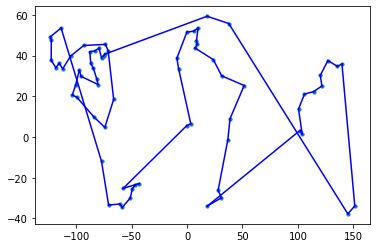

[[  0.           3.52796629   3.37623988 ...  81.32325763 112.63237968
   64.89723306]
 [  3.52796629   0.           6.90354999 ...  84.4356166  115.88555087
   67.89785176]
 [  3.37623988   6.90354999   0.         ...  78.33253568 109.49868138
   62.02636901]
 ...
 [ 81.32325763  84.4356166   78.33253568 ...   0.          32.65793498
   17.14298072]
 [112.63237968 115.88555087 109.49868138 ...  32.65793498   0.
   49.76263423]
 [ 64.89723306  67.89785176  62.02636901 ...  17.14298072  49.76263423
    0.        ]]


In [ ]:
tour,cost = nearest_neighbor(V)
print(cost)
plot_tour(V,tour)
C = cost_matrix(V)
print(C)

In [ ]:
print(tour)

[0, 10, 1, 19, 11, 16, 18, 3, 14, 4, 5, 9, 36, 37, 35, 32, 33, 31, 2, 20, 12, 15, 13, 7, 8, 6, 17, 21, 22, 30, 29, 28, 27, 24, 25, 23, 26, 34, 46, 41, 45, 69, 60, 63, 61, 65, 64, 67, 66, 40, 47, 44, 43, 38, 42, 39, 56, 57, 48, 49, 50, 51, 52, 53, 55, 54, 58, 59, 68, 62]


In [ ]:
data = pd.read_csv('profit.csv')
 
# create choropleth map for the data
# color will be the column to be color-coded
# locations is the column with sppatial coordinates
fig = px.choropleth(data, locations='CODE',
                    locationmode="ISO-3", color='PROFIT', scope="world")
fig.update_layout(
    title_text='Profit Data Visualization')
fig.show()